In [1]:
import pandas as pd   # Core libraries
import numpy as np
import matplotlib.pyplot as plt  # Visualization tools
import seaborn as sns 
from sklearn.preprocessing import StandardScaler # Preprocessing utilities
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN # Clustering algorithms
from sklearn.metrics import silhouette_score, davies_bouldin_score # Evaluation metrics
from sklearn.decomposition import PCA # Dimensionality reduction
import io # Miscellaneous


In [2]:

# Load the dataset
file_path = "Fragrance Dataset - COM7022 - [4037].csv"
df = pd.read_csv(file_path)

# Select the columns to be used for clustering
selected_cols = ['price', 'available', 'sold']
data_subset = df[selected_cols].copy()

# Handle missing values using median replacement
median_filler = SimpleImputer(strategy='median')
data_filled = pd.DataFrame(
    median_filler.fit_transform(data_subset),
    columns=selected_cols
)
# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filled)

print("Data successfully cleaned, imputed, and normalized.")



Data successfully cleaned, imputed, and normalized.


 2. Executing K-Means Elbow Analysis 


C:\Users\asora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\asora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\asora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\asora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Elbow method plot saved at: kmeans_elbow_plot.png

K-Means clustering completed with k = 6


C:\Users\asora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


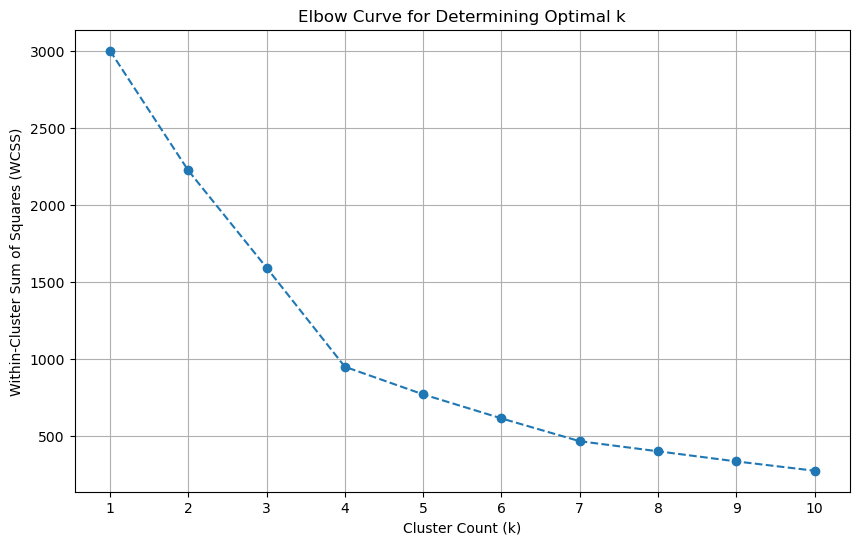

In [9]:

print(" 2. Executing K-Means Elbow Analysis ")

# --- Compute WCSS for a range of k values ---
inertia_values = []
candidate_k = range(1, 11)

for num_clusters in candidate_k:
    km_model = KMeans(
        n_clusters=num_clusters,
        init="k-means++",
        n_init=10,
        random_state=42
    )
    km_model.fit(scaled_data)
    inertia_values.append(km_model.inertia_)

# --- Plot the elbow curve ---
plt.figure(figsize=(10, 6))
plt.plot(candidate_k, inertia_values, marker='o', linestyle='--')
plt.title("Elbow Curve for Determining Optimal k")
plt.xlabel("Cluster Count (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.xticks(candidate_k)

# --- Save elbow plot ---
elbow_output = "kmeans_elbow_plot.png"
plt.savefig(elbow_output)
print(f"Elbow method plot saved at: {elbow_output}")

# --- Apply K-Means using a selected k value ---
chosen_k = 6
final_kmeans = KMeans(
    n_clusters=chosen_k,
    init="k-means++",
    n_init=10,
    random_state=42
)
kmeans_cluster_labels = final_kmeans.fit_predict(scaled_data)

print(f"\nK-Means clustering completed with k = {chosen_k}")

DBSCAN cluster plot saved to: dbscan_cluster_plot.png


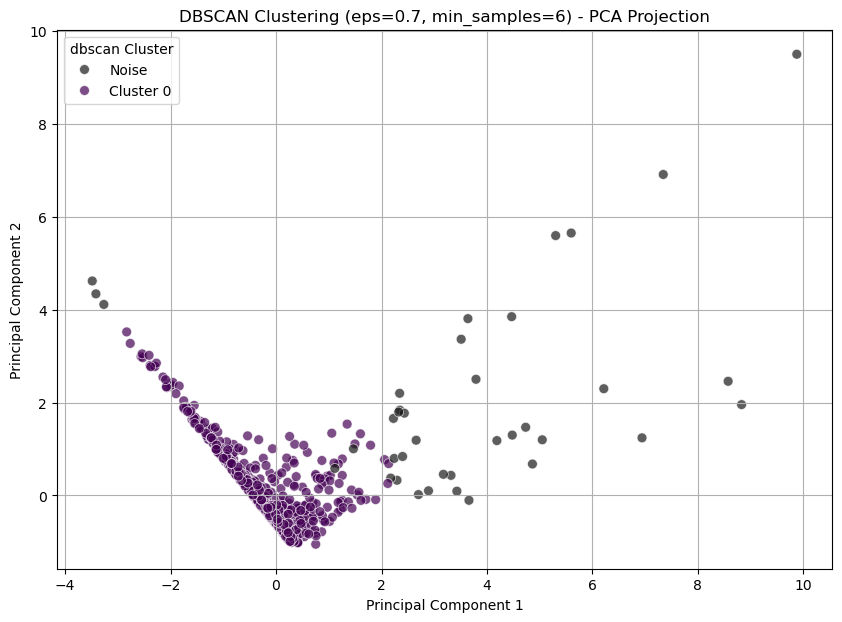

In [13]:
try:
    # --- DBSCAN hyperparameters ---
    eps_val = 0.7
    min_pts = 6

    # --- Run DBSCAN on the scaled dataset ---
    dbscan_model = DBSCAN(eps=eps_val, min_samples=min_pts)
    dbscan_assignments = dbscan_model.fit_predict(scaled_data)

    # --- Reduce dimensionality with PCA for visualization ---
    pca_model = PCA(n_components=2)
    pca_results = pca_model.fit_transform(scaled_data)

    # --- Build a DataFrame for plotting ---
    pca_frame = pd.DataFrame(pca_results, columns=["PC1", "PC2"])
    pca_frame["cluster_id"] = dbscan_assignments

    # --- Prepare the scatter plot ---
    plt.figure(figsize=(10, 7))

    labels_present = sorted(set(dbscan_assignments))
    num_clusters = sum(1 for lbl in labels_present if lbl != -1)

    valid_cluster_labels = [lbl for lbl in labels_present if lbl != -1]

    if num_clusters > 0:
        color_list = [plt.cm.viridis(pos) for pos in np.linspace(0, 1, num_clusters)]
    else:
        color_list = []

    color_map = {-1: (0.1, 0.1, 0.1, 1.0)}  # noise color
    color_map.update({lbl: col for lbl, col in zip(valid_cluster_labels, color_list)})

    sns.scatterplot(
        x="PC1",
        y="PC2",
        data=pca_frame,
        hue="cluster_id",
        palette=color_map,
        s=50,
        alpha=0.7
    )

    plt.title(f"DBSCAN Clustering (eps={eps_val}, min_samples={min_pts}) - PCA Projection")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

    # --- Customize legend labels ---
    handles, label_texts = plt.gca().get_legend_handles_labels()
    revised_labels = ["Noise" if lbl == "-1" else f"Cluster {lbl}" for lbl in label_texts]
    plt.legend(handles=handles, labels=revised_labels, title="dbscan Cluster")

    plt.grid(True)

    output_path = "dbscan_cluster_plot.png"
    plt.savefig(output_path)
    print(f"DBSCAN cluster plot saved to: {output_path}")

except Exception as err:
    print(f"An error occurred: {err}")


In [17]:
silhouette_avg = silhouette_score(scaled_data, kmeans_labels)
print(f"Clustering Performance Metric - Silhouette Score (k=5): {silhouette_avg:.5f}")
print("---") # Alternative separator
db_index = davies_bouldin_score(scaled_data, kmeans_labels)

print(f"Separation Metric - Davies-Bouldin Index (k=5): {db_index:.5f}")


NameError: name 'kmeans_labels' is not defined